In [2]:
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [3]:
# Load the CSV file from the data folder into a DataFrame
main_df = pd.read_csv("data/diabetes_dataset.csv")

# Display the first few rows of the DataFrame
main_df.head(3)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


In [4]:
main_df["Diabetes_012"].value_counts()

Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

In [5]:
#main_df = main_df.drop(columns=['Fruits', 'GenHlth','AnyHealthcare','NoDocbcCost','Sex','CholCheck','Veggies','HvyAlcoholConsump','MentHlth','Smoker'])
main_df = main_df[main_df["Diabetes_012"] != 1]

In [6]:
# Selecting all columns EXCEPT our target column as features of the model

features = main_df.drop(columns=['Diabetes_012'])

In [7]:
# Defining the target column, as in, what do we want the model to predict

target = main_df["Diabetes_012"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [9]:
normalizer = MinMaxScaler()

normalizer.fit(X_train)

MinMaxScaler()

In [10]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [11]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head(3)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,0.151163,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.333333,0.5,1.0,0.0,1.000000,0.8,0.857143
1,1.0,1.0,1.0,0.232558,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.50,0.100000,0.1,0.0,0.0,0.583333,1.0,0.428571
2,1.0,1.0,1.0,0.220930,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.00,0.000000,0.0,0.0,1.0,0.583333,0.6,0.857143


In [12]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head(3)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,0.279070,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.75,0.166667,0.166667,0.0,1.0,0.416667,0.6,1.0
1,1.0,0.0,1.0,0.244186,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.50,0.000000,0.000000,0.0,0.0,1.000000,0.6,0.0
2,1.0,1.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,0.0,1.0,0.666667,1.0,1.0


In [13]:
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_norm, y_train)

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
rf_classifier = RandomForestClassifier(
    n_estimators=500,        # Number of trees in the forest
    max_depth=None,          # Maximum depth of each tree; 'None' allows nodes to expand until all leaves are pure
    min_samples_split=2,     # Minimum samples required to split an internal node
    min_samples_leaf=1,      # Minimum samples required to be at a leaf node
    max_features= 'log2',    # Number of features to consider at each split ('auto' = sqrt of n_features)
    random_state=42,         # Random seed for reproducibility
    class_weight=None
)

# Fit the model to training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = rf_classifier.predict(X_test_norm)


In [15]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))

Classification Report:
               precision    recall  f1-score   support

         0.0     0.9522    0.7040    0.8095     42756
         2.0     0.3045    0.7857    0.4389      7054

    accuracy                         0.7155     49810
   macro avg     0.6283    0.7448    0.6242     49810
weighted avg     0.8605    0.7155    0.7570     49810



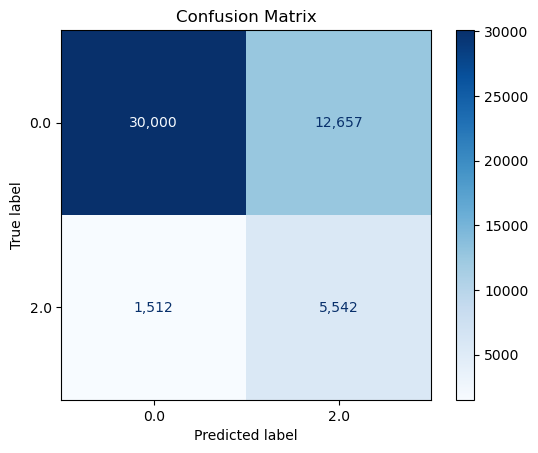

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

display_labels = sorted(set(y_test))

# Display the confusion matrix with non-scientific notation
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Disable scientific notation and format numbers as integers
for text in disp.text_.ravel():
    text.set_text(f'{int(float(text.get_text())):,}')

plt.title('Confusion Matrix')
plt.show()


In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a BaggingClassifier with a DecisionTreeClassifier as the base estimator
bagging_clf = BaggingClassifier(
    n_estimators=500,        # Number of trees in the forest
    random_state=42,         # Random seed for reproducibility
)

# Train the model
bagging_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = bagging_clf.predict(X_test_norm)

In [16]:
from sklearn.metrics import classification_report

print("Classification Report:\n", classification_report(y_test, y_pred,digits=4))

Classification Report:
               precision    recall  f1-score   support

         0.0     0.9481    0.6970    0.8034     42756
         2.0     0.2950    0.7686    0.4264      7054

    accuracy                         0.7071     49810
   macro avg     0.6216    0.7328    0.6149     49810
weighted avg     0.8556    0.7071    0.7500     49810



import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix

###### Load the data
data = pd.read_csv('C:/Users/Srnzzz/Documents/5- Ironhack/ML/heart_disease_health_indicators_BRFSS2015.csv', delimiter=';')

###### 'HeartDiseaseorAttack' will be the target variable (y)
features = data.drop('HeartDiseaseorAttack', axis=1)
target = data['HeartDiseaseorAttack']

###### Split the data initially
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

###### Step 1: Identify columns with more than 2 unique values
columns_to_normalize = X_train.columns[X_train.nunique() > 2]

###### Step 2: Normalize only those columns
normalizer = MinMaxScaler()
X_train_norm = X_train.copy()  # Make a copy to preserve original DataFrame
X_train_norm[columns_to_normalize] = normalizer.fit_transform(X_train[columns_to_normalize])
X_test_norm = X_test.copy()
X_test_norm[columns_to_normalize] = normalizer.transform(X_test[columns_to_normalize])

###### Step 3: Apply Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_norm, y_train)

###### Print class distribution before and after undersampling
print("Original class distribution:")
print(y_train.value_counts(normalize=True))
print("\nResampled class distribution:")
print(y_train_resampled.value_counts(normalize=True))

###### Initialize Random Forest model
base_rf = RandomForestClassifier(random_state=42)

###### Define hyperparameter search space
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

###### Perform randomized search for hyperparameter tuning
random_search = RandomizedSearchCV(
    base_rf,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    random_state=42,
    n_jobs=-1,
    scoring='recall'  # Using recall as the evaluation metric
)

###### Fit model on resampled data
random_search.fit(X_train_resampled, y_train_resampled)

###### Get the best model
final_model = random_search.best_estimator_

###### Predict on test set
y_pred = final_model.predict(X_test_norm)

###### Feature importance analysis
feature_contributions = pd.DataFrame({
    'feature': features.columns,
    'contribution': final_model.feature_importances_
}).sort_values('contribution', ascending=False)

###### Print model performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

###### Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

###### Print top 10 most important features
print("\nTop 10 Most Important Features:")
print(feature_contributions.head(10))

###### Print best hyperparameters
print("\nBest Hyperparameters:")
print(random_search.best_params_)


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

###### Define the parameter grid based on your existing model's parameters
param_grid = {
    'n_estimators': [500],          # Number of trees in the forest
    'max_depth': [None, 10, 20],         # Maximum depth of each tree
    'min_samples_split': [2, 5],         # Minimum samples to split a node
    'min_samples_leaf': [1, 2],          # Minimum samples at a leaf node
    'max_features': ['log2', 'sqrt'],    # Number of features to consider for each split
    'class_weight': [None, 'balanced']   # Class balancing
}

###### Initialize the base RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

###### Set up GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='recall',     # You can choose 'accuracy' or another relevant metric
    cv=3,                      # Number of cross-validation folds
    n_jobs=-1,                 # Use all cores
    verbose=2                  # Print progress (optional)
)

###### Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

###### Print the best parameters and best score from the grid search
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

###### Use the best estimator to make predictions
best_rf = grid_search.best_estimator_  # Extract the best model
y_pred = best_rf.predict(X_test)

###### Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
